In [2]:
#Ahora veremos el modulo de Analisis Bivariado
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import empiricaldist
import scipy

In [3]:
datosEnBruto= pd.read_csv("Encuesta de Remuneracion salarial Argentina.csv")

In [4]:
# Eliminemos los datos nulos por columna
datos =(
    datosEnBruto
    .dropna(axis=1)
)

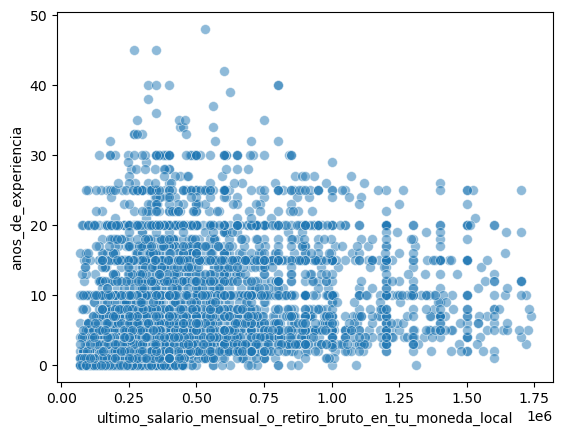

In [5]:
sns.scatterplot(
    data= datos,
    x= 'ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local',
    y= 'anos_de_experiencia',
    alpha=1/2,
    s=50
);
#pense que a mayor años de experiencia, mayor salario

In [14]:
# Tuve un error al intentar graficar con la variable tengo_edad ya que algunos elementos no
#eran numeros por consiguiente cree un codigo para identificar los datos anomalos y corregirlos
#o en su defecto eliminarlos.
for indice, valor in datosEnBruto['tengo_edad'].items():
    try:
        datosEnBruto.at[indice, 'tengo_edad'] = int(valor)
    except ValueError:
        print(f"El valor en la fila {indice} no se puede, dice: ",valor)
#Se agrego por que a menos que sean vampiros o entidades, no pueden tener esa edad.
    if valor >=120 or valor<15:
        datos = datos.drop(indice)

KeyError: '[294] not found in axis'

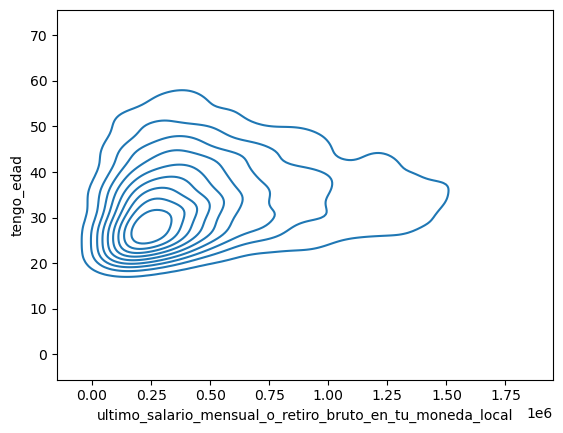

In [69]:
sns.kdeplot(
    data=datos,
    x= 'ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local',
    y= 'tengo_edad'
);
#Aqui esta la grafica usando la variable tengo_edad

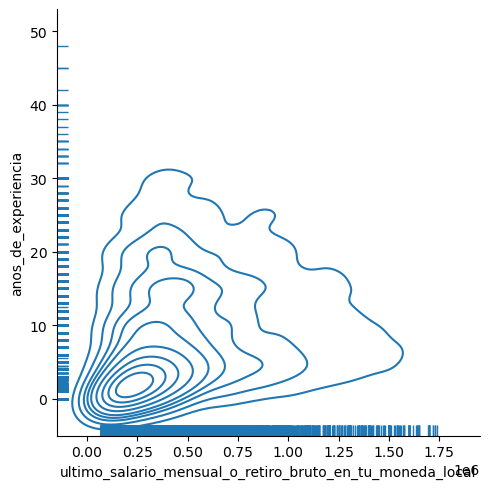

In [32]:
sns.displot(
    data=datos,
    x= 'ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local',
    y= 'anos_de_experiencia',
    rug= True,
    kind='kde'
);

¿Que significan los datos que obtuvimos?

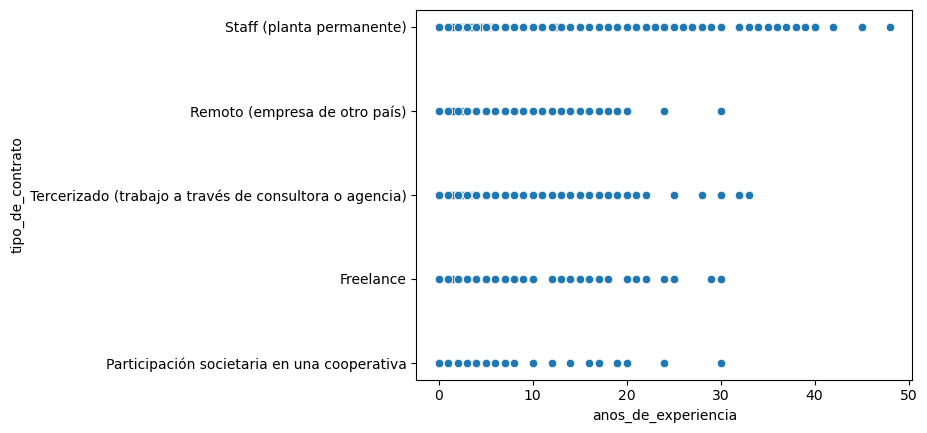

In [35]:
#Graficas de Violin y bloxplot
sns.scatterplot(
    data=datos,
    x= 'anos_de_experiencia',
    y='tipo_de_contrato'
);

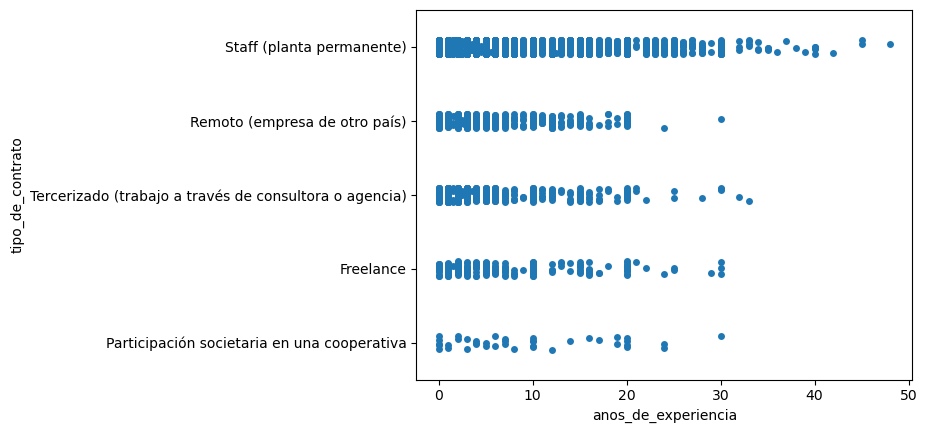

In [38]:
sns.stripplot(
    data=datos,
    x= 'anos_de_experiencia',
    y='tipo_de_contrato'
);

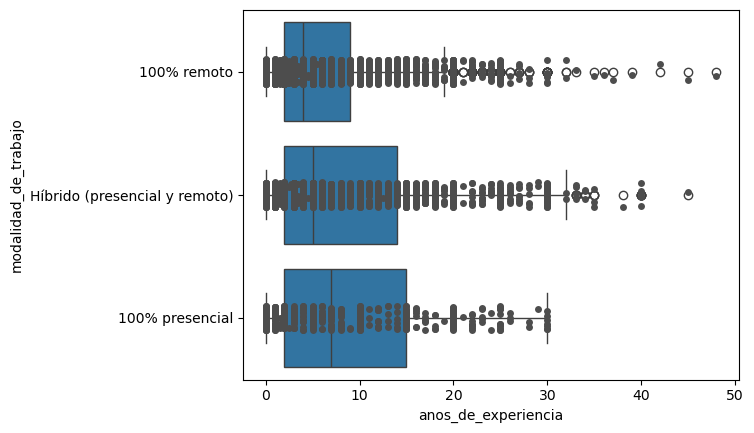

In [6]:
ax= sns.boxplot(
    data=datos,
    x= 'anos_de_experiencia',
    y='modalidad_de_trabajo'
);
ax=sns.stripplot(
    data=datos,
    x= 'anos_de_experiencia',
    y='modalidad_de_trabajo',
    color= '.3'
);
#minuto 7:19 lo q hacemos es agregar al bloxplot puntitos para visualizar mejor, ax= , ax=...

In [7]:
# ver analisis bivariado entre años y salario tengo_edad, 

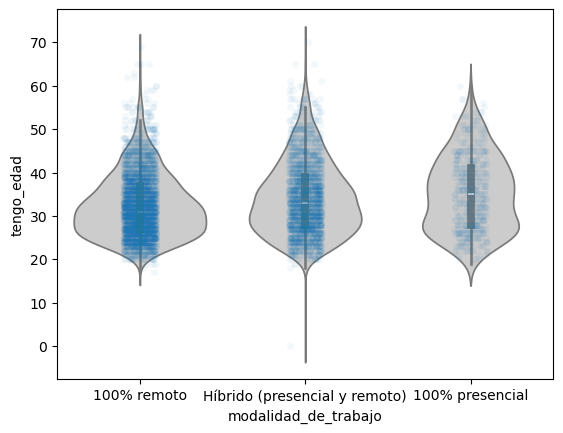

In [87]:
ax= sns.violinplot(
    data=datos,
    x='modalidad_de_trabajo',
    y='tengo_edad',
    color='.8'
)

ax=sns.stripplot(
   data=datos,
    x='modalidad_de_trabajo',
    y='tengo_edad',
    alpha=1/20
)

In [41]:
sns.swarmplot(
    data=datos,
    x='modalidad_de_trabajo',
    y='tengo_edad',
    hue='modalidad_de_trabajo'
)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f4f4b7c84c0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [28]:
#Estableciendo Relaciones, Matrices de correlacion
datos.corr(numeric_only=True)

,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,que_tan_conforme_estas_con_tus_ingresos_laborales,anos_de_experiencia,antigüedad_en_la_empresa_actual,tiempo_en_el_puesto_actual,cuantas_personas_a_cargo_tenes,la_recomendas_como_un_buen_lugar_para_trabajar,tengo_edad,sueldo_dolarizado
ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,1.000000,0.369392,0.308801,0.065085,0.012450,0.193973,0.138066,0.201758,0.037497
que_tan_conforme_estas_con_tus_ingresos_laborales,0.369392,1.000000,-0.033811,-0.157539,-0.008131,-0.003673,0.420568,-0.101427,0.010128
anos_de_experiencia,0.308801,-0.033811,1.000000,0.482299,0.082711,0.242428,-0.096603,0.729184,-0.010896
antigüedad_en_la_empresa_actual,0.065085,-0.157539,0.482299,1.000000,0.148016,0.164590,-0.158512,0.435278,-0.008011
tiempo_en_el_puesto_actual,0.012450,-0.008131,0.082711,0.148016,1.000000,0.008638,-0.015943,0.068274,-0.003325
cuantas_personas_a_cargo_tenes,0.193973,-0.003673,0.242428,0.164590,0.008638,1.000000,-0.004703,0.193209,-0.012446
la_recomendas_como_un_buen_lugar_para_trabajar,0.138066,0.420568,-0.096603,-0.158512,-0.015943,-0.004703,1.000000,-0.123047,0.005025
tengo_edad,0.201758,-0.101427,0.729184,0.435278,0.068274,0.193209,-0.123047,1.000000,0.002288
sueldo_dolarizado,0.037497,0.010128,-0.010896,-0.008011,-0.003325,-0.012446,0.005025,0.002288,1.000000


In [10]:
#cambiamos nombre de columna por que son redundante
datos.set_index('como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior', inplace=True)
datos.index.name = 'ingresos_comparados_anterior_semestre'
datos.reset_index(inplace=True)
datos.set_index('si_trabajas_bajo_un_esquema_hibrido_cuantos_dias_a_la_semana_vas_a_la_oficina', inplace=True)
datos.index.name = 'dias_x_semana_en_esquema_hibrido'
datos.reset_index(inplace=True)

In [ ]:
datos

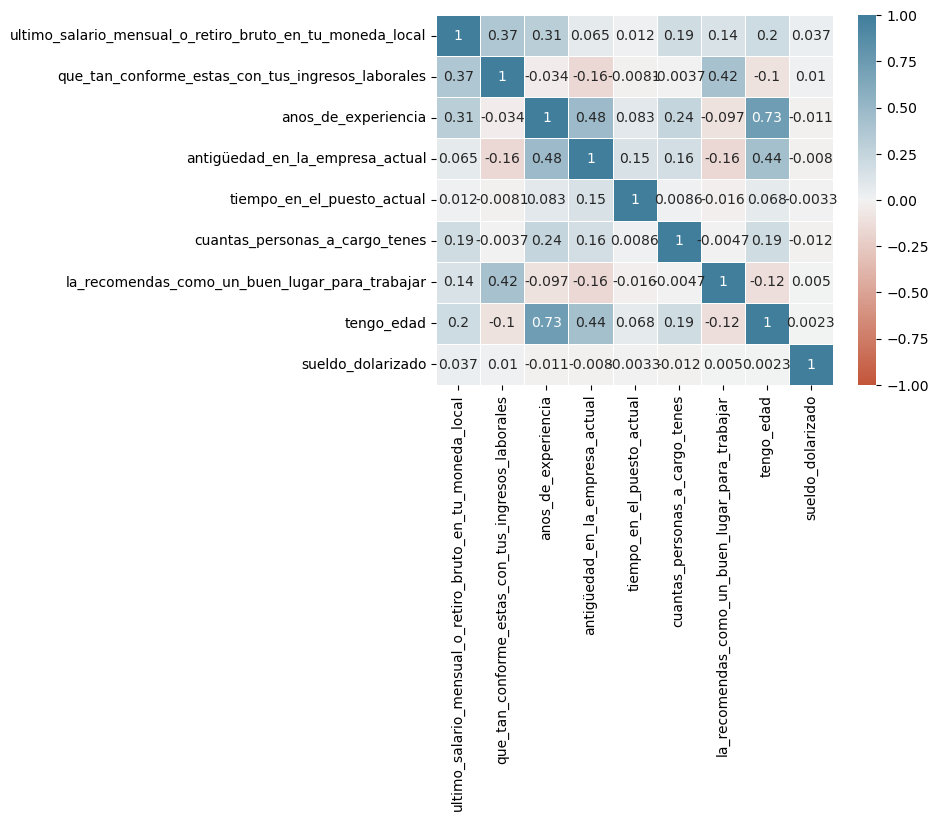

In [26]:
sns.heatmap(
    cmap=sns.diverging_palette(20,230, as_cmap=True),
    data=datos.corr(numeric_only=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
);

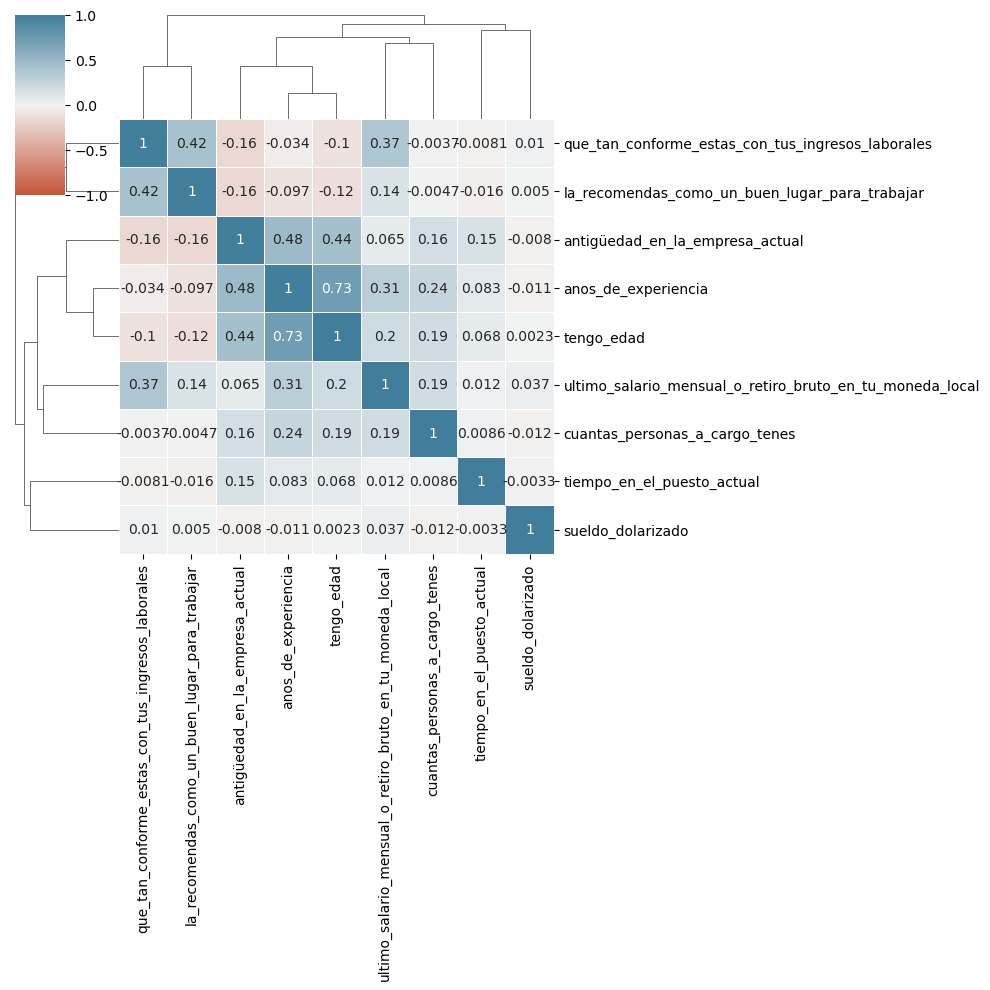

In [27]:
sns.clustermap(
    cmap=sns.diverging_palette(20,230, as_cmap=True),
    data=datos.corr(numeric_only=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
);

In [34]:
(
    datos
    .assign(
        numeric_dedicacion= lambda df : df.dedicacion.replace(['Full-Time','Part-Time'],[1,0])
    )
)

,estoy_trabajando_en,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,recibis_algun_tipo_de_bono,a_que_esta_atado_el_bono,tuviste_actualizaciones_de_tus_ingresos_laborales_durante_2022,en_que_mes_fue_el_ultimo_ajuste,como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior,...,cantidad_de_personas_en_tu_organizacion,modalidad_de_trabajo,si_trabajas_bajo_un_esquema_hibrido_cuantos_dias_a_la_semana_vas_a_la_oficina,la_recomendas_como_un_buen_lugar_para_trabajar,salir_o_seguir_contestando,tengo_edad,me_identifico_genero,sueldo_dolarizado,seniority,numeric_dedicacion
0,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),475480.0,Menos de un sueldo,Dolar MEP,Uno,Noviembre,3,...,Más de 10000 personas,100% remoto,0,10,Terminar encuesta,25,Varón Cis,False,Semi-Senior,1
1,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),260000.0,No,No recibo bono,Tres,Octubre,3,...,Más de 10000 personas,100% remoto,0,8,Terminar encuesta,27,Mujer Cis,False,Junior,1
2,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),106350.0,No,No recibo bono,Uno,Diciembre,3,...,De 201 a 500 personas,Híbrido (presencial y remoto),1,8,Terminar encuesta,21,Varón Cis,False,Junior,1
3,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),339000.0,Un sueldo,Performance individual,Tres,Noviembre,2,...,De 101 a 200 personas,100% remoto,0,8,Responder sobre guardias,25,Varón Cis,False,Semi-Senior,1
4,Argentina,Río Negro,Full-Time,Staff (planta permanente),380000.0,Un sueldo,Performance individual,Uno,Septiembre,4,...,Más de 10000 personas,100% remoto,0,10,Terminar encuesta,24,Varón Cis,True,Junior,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),897000.0,De uno a tres sueldos,Mix de las anteriores,Más de tres,Diciembre,2,...,Más de 10000 personas,100% remoto,0,7,Responder sobre mis estudios,39,Varón Cis,False,Senior,1
5760,Argentina,Tucumán,Full-Time,Staff (planta permanente),130000.0,Un sueldo,Objetivos,Dos,Diciembre,2,...,De 501 a 1000 personas,100% presencial,0,5,Terminar encuesta,40,Varón Cis,False,Senior,1
5761,Argentina,Buenos Aires,Part-Time,Freelance,250000.0,No,No recibo bono,Uno,Agosto,3,...,1 (solamente yo),Híbrido (presencial y remoto),3,0,Terminar encuesta,21,Varón Cis,False,Senior,0
5762,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),230000.0,No,No recibo bono,Uno,Octubre,2,...,De 2 a 10 personas,100% presencial,0,7,Terminar encuesta,29,Varón Cis,False,Semi-Senior,1


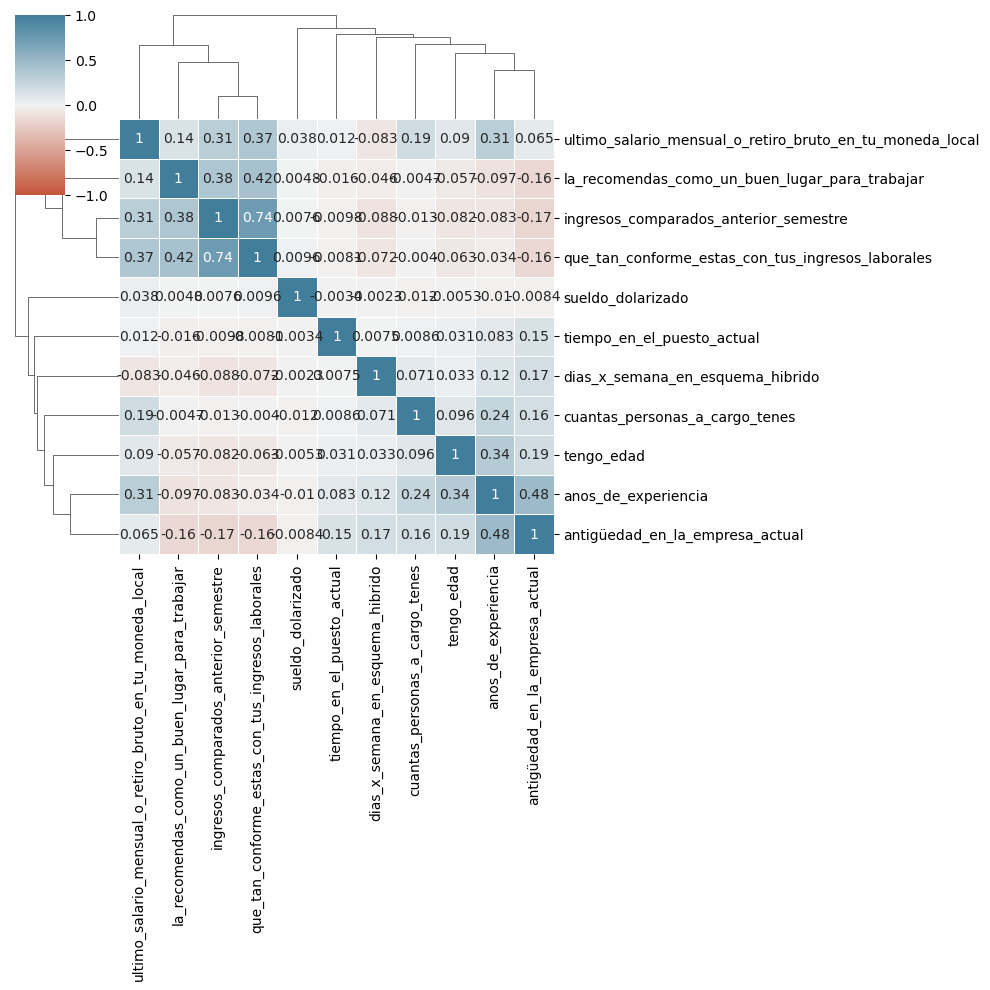

In [40]:
sns.clustermap(
    cmap=sns.diverging_palette(20,230, as_cmap=True),
    data=datos.corr(numeric_only=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
);

array([[1.        , 0.91662918],
       [0.91662918, 1.        ]])

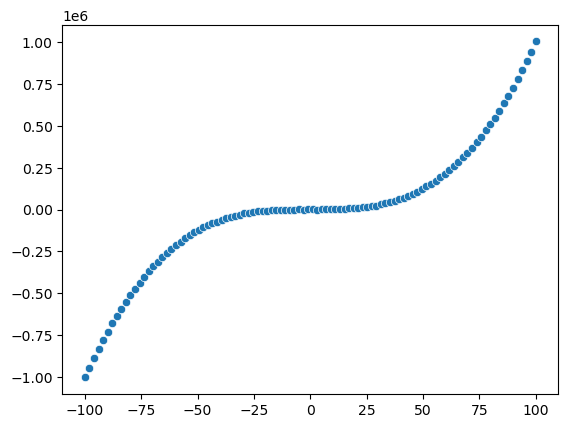

In [13]:
# de una correlacion lineal
x = np.linspace(-100,100,100)
y = x**3
y += np.random.normal(0,1000,x.size)

sns.scatterplot(
    x=x,
    y=y
);

np.corrcoef(x,y)

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


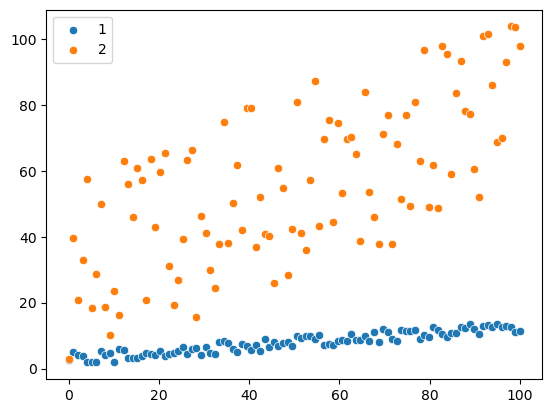

In [5]:
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1)


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))

In [27]:
# Limitaciones del analisis de regresion simple
x= datos.anos_de_experiencia
y= datos.tengo_edad

res_x_y = scipy.stats.linregress(x=x,y=y)
res_y_x = scipy.stats.linregress(x=y,y=x)

print(res_x_y,res_y_x,sep='\n')

LinregressResult(slope=0.8102190887092527, intercept=27.51603339807197, rvalue=0.7291841556699503, pvalue=0.0, stderr=0.010021316795655403, intercept_stderr=0.10057755530336615)
LinregressResult(slope=0.6562540185607778, intercept=-14.722488989062043, rvalue=0.7291841556699503, pvalue=0.0, stderr=0.008116976642572616, intercept_stderr=0.27760909561300706)


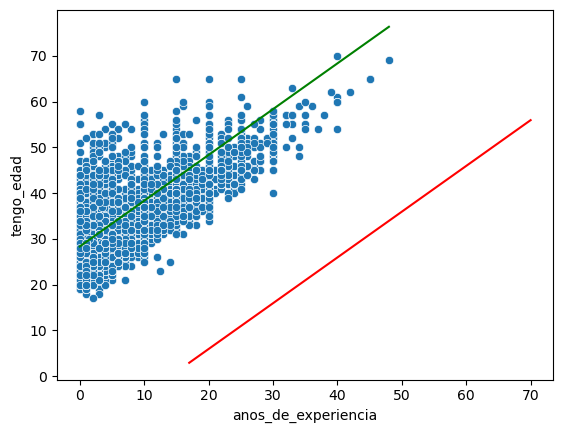

In [28]:
sns.scatterplot(
    x=x,
    y=y
)

fx1= np.array([x.min(),x.max()])
fy1= res_x_y.intercept + res_x_y.slope + fx1

fx2= np.array([y.min(),y.max()])
fy2= res_y_x.intercept + res_y_x.slope + fx2

plt.plot(fx1,fy1,color='green');
plt.plot(fx2,fy2,color='red');

In [26]:
import statsmodels.formula.api as smf
(
    smf.ols(
        formula='tengo_edad ~ anos_de_experiencia',
        data=datos
    )
    .fit()
    .params
)

Intercept              27.516033
anos_de_experiencia     0.810219
dtype: float64